# Question 1


Sample Mean: 502.67 hours
Z-statistic: 0.1461
P-value: 0.8839
Conclusion: Fail to reject the null hypothesis
Explanation: There is not enough evidence to suggest that the mean battery lifetime differs from 500 hours.


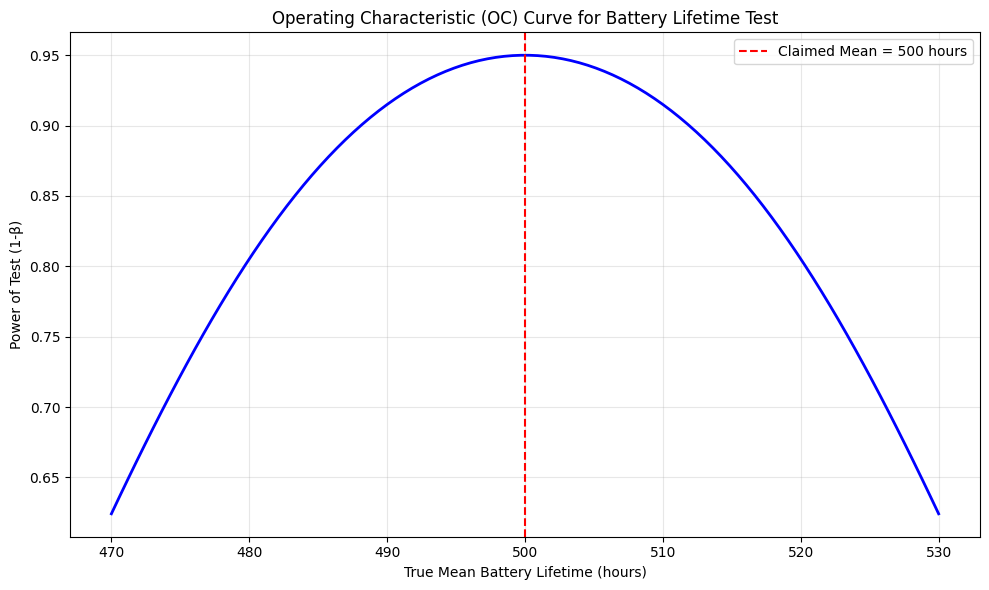

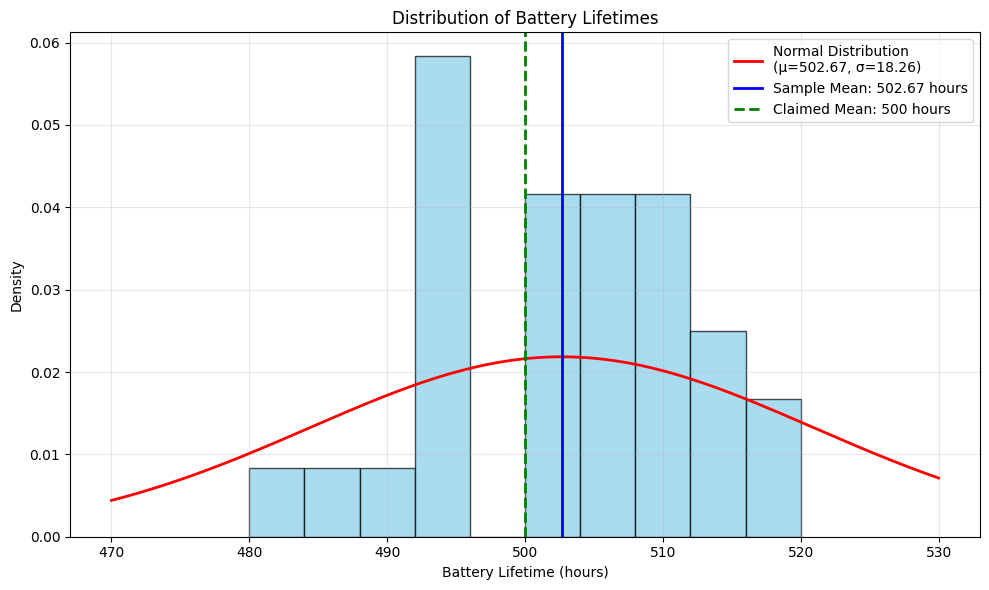

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Battery lifetime data
battery_lifetimes = np.array([495, 520, 510, 505, 480, 500, 515, 495, 510, 505, 490, 515, 495, 505, 500,
                             510, 485, 495, 500, 520, 510, 495, 505, 500, 515, 505, 495, 510, 500, 495])

claimed_mean = 500
known_std_dev = 100
sample_size = len(battery_lifetimes)
significance_level = 0.05

# Step 1: Calculate sample statistics
sample_mean = np.mean(battery_lifetimes)
print(f"Sample Mean: {sample_mean:.2f} hours")

# Step 2: Calculate the z-statistic
z_stat = (sample_mean - claimed_mean) / (known_std_dev / np.sqrt(sample_size))
print(f"Z-statistic: {z_stat:.4f}")

# Step 3: Calculate the p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
print(f"P-value: {p_value:.4f}")

# Step 4: Draw conclusion
if p_value < significance_level:
    conclusion = "Reject the null hypothesis"
    explanation = "There is significant evidence that the mean battery lifetime differs from 500 hours."
else:
    conclusion = "Fail to reject the null hypothesis"
    explanation = "There is not enough evidence to suggest that the mean battery lifetime differs from 500 hours."

print(f"Conclusion: {conclusion}")
print(f"Explanation: {explanation}")

# Step 5: Plot the Operating Characteristic (OC) curve
true_means = np.linspace(claimed_mean - 30, claimed_mean + 30, 100)
beta_values = []

for mu in true_means:
    # For two-tailed test with alpha = 0.05, critical z-values are ±1.96
    critical_z = stats.norm.ppf(1 - significance_level / 2)

    # Calculate lower and upper bounds for acceptance region
    lower_bound = claimed_mean - critical_z * (known_std_dev / np.sqrt(sample_size))
    upper_bound = claimed_mean + critical_z * (known_std_dev / np.sqrt(sample_size))

    # Calculate probability of not rejecting H0 (Type II error probability if H0 is false)
    prob_lower = stats.norm.cdf((lower_bound - mu) / (known_std_dev / np.sqrt(sample_size)))
    prob_upper = 1 - stats.norm.cdf((upper_bound - mu) / (known_std_dev / np.sqrt(sample_size)))
    beta = prob_lower + prob_upper
    beta_values.append(1 - beta)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(true_means, beta_values, 'b-', linewidth=2)
plt.axvline(x=claimed_mean, color='r', linestyle='--', label='Claimed Mean = 500 hours')
plt.grid(True, alpha=0.3)
plt.xlabel('True Mean Battery Lifetime (hours)')
plt.ylabel('Power of Test (1-β)')
plt.title('Operating Characteristic (OC) Curve for Battery Lifetime Test')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(battery_lifetimes, bins=10, density=True, alpha=0.7, color='skyblue', edgecolor='black')

# Add a normal curve overlay
x = np.linspace(min(battery_lifetimes) - 10, max(battery_lifetimes) + 10, 1000)
y = stats.norm.pdf(x, sample_mean, known_std_dev / np.sqrt(sample_size))
plt.plot(x, y, 'r-', linewidth=2, label=f'Normal Distribution\n(μ={sample_mean:.2f}, σ={known_std_dev/np.sqrt(sample_size):.2f})')

plt.axvline(x=sample_mean, color='blue', linestyle='-', linewidth=2, label=f'Sample Mean: {sample_mean:.2f} hours')
plt.axvline(x=claimed_mean, color='green', linestyle='--', linewidth=2, label=f'Claimed Mean: {claimed_mean} hours')

plt.xlabel('Battery Lifetime (hours)')
plt.ylabel('Density')
plt.title('Distribution of Battery Lifetimes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Question 2

Sample Statistics:
Sample Size: 20
Sample Mean: 353.80 gallons per day
Sample Variance: 477.33
Sample Standard Deviation: 21.85

Case (a): Known Variance Test (Z-test)
Z-statistic: 1.4162
P-value: 0.1567
Conclusion: Fail to reject the null hypothesis
Explanation: There is not enough evidence to contradict the official's claim that the mean water usage is 350 gallons per day.

Case (b): Unknown Variance Test (t-test)
t-statistic: 0.7778
P-value: 0.4462
Conclusion: Fail to reject the null hypothesis
Explanation: There is not enough evidence to contradict the official's claim that the mean water usage is 350 gallons per day.


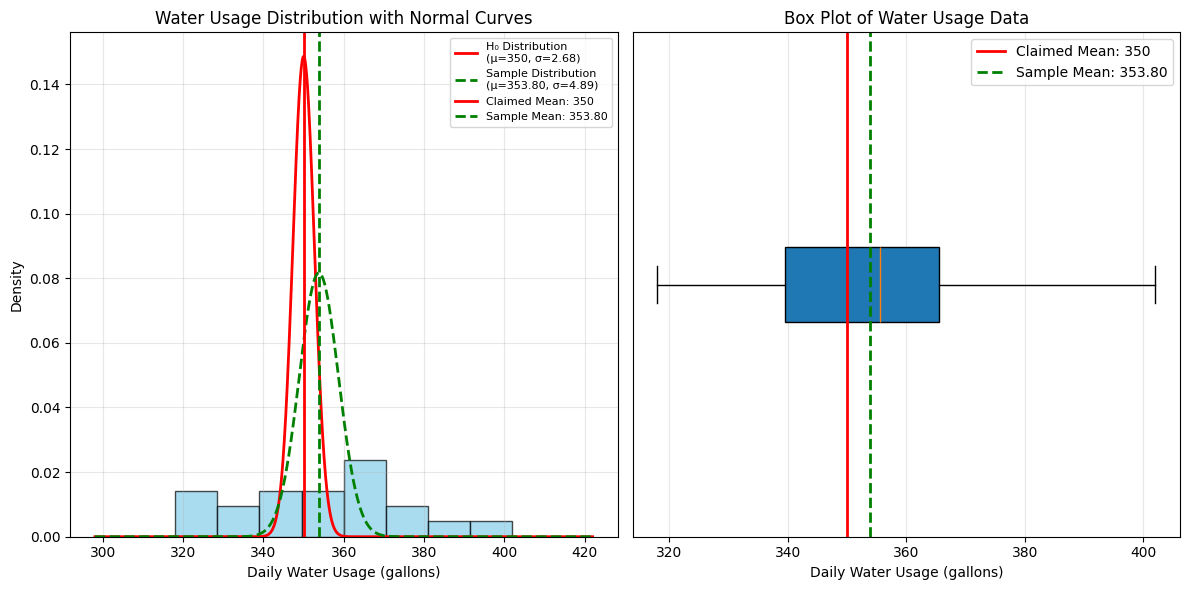

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Home water usage data (gallons per day)
water_usage = np.array([340, 344, 362, 375, 356, 386, 354, 364, 332, 402, 340, 355, 362, 322, 372, 324, 318, 360, 338, 370])

# Given information
claimed_mean = 350  # Claimed mean water usage in gallons per day
known_variance = 144  # Case (a): Known population variance
significance_level = 0.05

# Calculate sample statistics
sample_size = len(water_usage)
sample_mean = np.mean(water_usage)
sample_variance = np.var(water_usage, ddof=1)  # Sample variance with Bessel's correction
sample_std = np.sqrt(sample_variance)

print("Sample Statistics:")
print(f"Sample Size: {sample_size}")
print(f"Sample Mean: {sample_mean:.2f} gallons per day")
print(f"Sample Variance: {sample_variance:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")

# Case (a): Known variance test (Z-test)
print("\nCase (a): Known Variance Test (Z-test)")

# Calculate Z-statistic
z_stat = (sample_mean - claimed_mean) / np.sqrt(known_variance / sample_size)
print(f"Z-statistic: {z_stat:.4f}")

# Calculate p-value (two-tailed test)
p_value_z = 2 * (1 - stats.norm.cdf(abs(z_stat)))
print(f"P-value: {p_value_z:.4f}")

# Draw conclusion for Z-test
if p_value_z < significance_level:
    z_conclusion = "Reject the null hypothesis"
    z_explanation = "There is significant evidence to contradict the official's claim that the mean water usage is 350 gallons per day."
else:
    z_conclusion = "Fail to reject the null hypothesis"
    z_explanation = "There is not enough evidence to contradict the official's claim that the mean water usage is 350 gallons per day."

print(f"Conclusion: {z_conclusion}")
print(f"Explanation: {z_explanation}")

# Case (b): Unknown variance test (t-test)
print("\nCase (b): Unknown Variance Test (t-test)")

# Calculate t-statistic
t_stat = (sample_mean - claimed_mean) / (sample_std / np.sqrt(sample_size))
print(f"t-statistic: {t_stat:.4f}")

# Calculate p-value (two-tailed test)
p_value_t = 2 * (1 - stats.t.cdf(abs(t_stat), df=sample_size-1))
print(f"P-value: {p_value_t:.4f}")

# Draw conclusion for t-test
if p_value_t < significance_level:
    t_conclusion = "Reject the null hypothesis"
    t_explanation = "There is significant evidence to contradict the official's claim that the mean water usage is 350 gallons per day."
else:
    t_conclusion = "Fail to reject the null hypothesis"
    t_explanation = "There is not enough evidence to contradict the official's claim that the mean water usage is 350 gallons per day."

print(f"Conclusion: {t_conclusion}")
print(f"Explanation: {t_explanation}")

# Visualization: Comparing the data with the claimed mean
plt.figure(figsize=(12, 6))

# Plot 1: Histogram with normal distributions
plt.subplot(1, 2, 1)
plt.hist(water_usage, bins=8, density=True, alpha=0.7, color='skyblue', edgecolor='black')

# Add normal distributions
x = np.linspace(min(water_usage) - 20, max(water_usage) + 20, 1000)
# Z-test distribution (known variance)
y_z = stats.norm.pdf(x, claimed_mean, np.sqrt(known_variance / sample_size))
plt.plot(x, y_z, 'r-', linewidth=2, label=f'H₀ Distribution\n(μ={claimed_mean}, σ={np.sqrt(known_variance/sample_size):.2f})')

# T-test distribution (sample variance)
y_t = stats.norm.pdf(x, sample_mean, sample_std / np.sqrt(sample_size))
plt.plot(x, y_t, 'g--', linewidth=2, label=f'Sample Distribution\n(μ={sample_mean:.2f}, σ={sample_std/np.sqrt(sample_size):.2f})')

plt.axvline(x=claimed_mean, color='red', linestyle='-', linewidth=2, label=f'Claimed Mean: {claimed_mean}')
plt.axvline(x=sample_mean, color='green', linestyle='--', linewidth=2, label=f'Sample Mean: {sample_mean:.2f}')

plt.xlabel('Daily Water Usage (gallons)')
plt.ylabel('Density')
plt.title('Water Usage Distribution with Normal Curves')
plt.legend(loc='upper right', fontsize=8)
plt.grid(True, alpha=0.3)

# Plot 2: Box plot to visualize the data
plt.subplot(1, 2, 2)
plt.boxplot(water_usage, vert=False, patch_artist=True)
plt.axvline(x=claimed_mean, color='red', linestyle='-', linewidth=2, label=f'Claimed Mean: {claimed_mean}')
plt.axvline(x=sample_mean, color='green', linestyle='--', linewidth=2, label=f'Sample Mean: {sample_mean:.2f}')

plt.yticks([])
plt.xlabel('Daily Water Usage (gallons)')
plt.title('Box Plot of Water Usage Data')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Question 3

Paired t-test for Diet Plan Effect
----------------------------------
Sample size: 10
Mean weight difference (before - after): 2.67 kg
Standard deviation of differences: 0.45 kg
Standard error of the mean difference: 0.1415 kg
t-statistic: 18.8745
p-value (one-tailed): 0.000000
Conclusion: Reject the null hypothesis
Explanation: There is significant evidence that the diet plan reduces body weight.


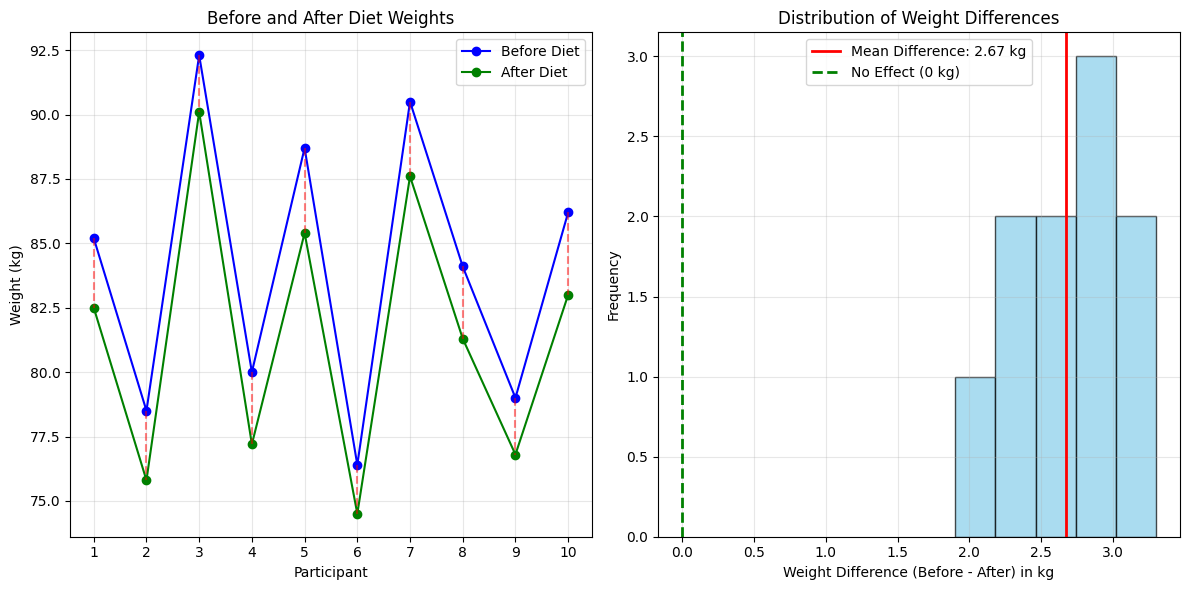

<ipython-input-10-7693241b0397>:78: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([before_weights, after_weights], labels=['Before Diet', 'After Diet'], patch_artist=True,


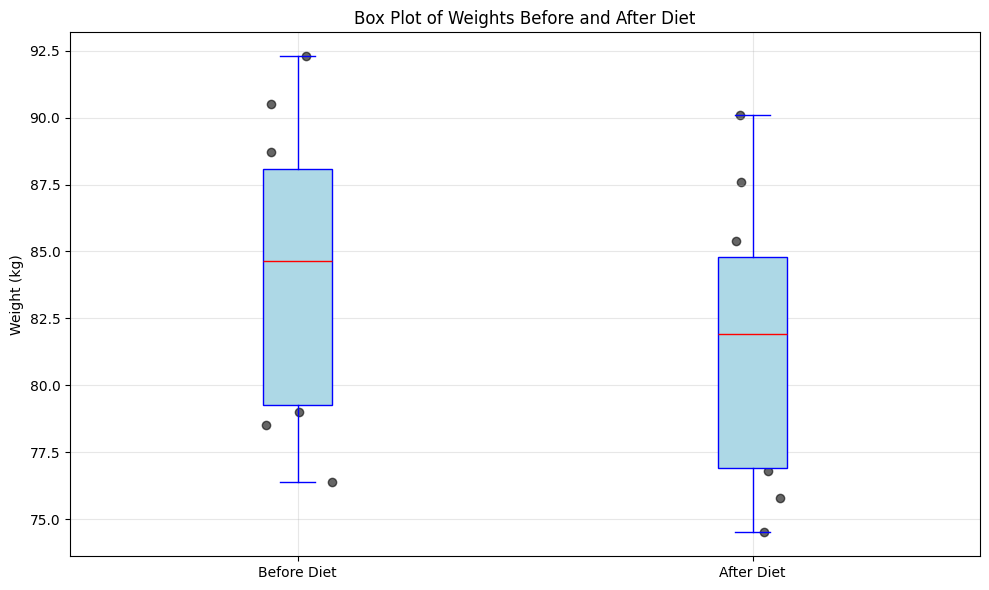

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

before_weights = np.array([85.2, 78.5, 92.3, 80.0, 88.7, 76.4, 90.5, 84.1, 79.0, 86.2])
after_weights = np.array([82.5, 75.8, 90.1, 77.2, 85.4, 74.5, 87.6, 81.3, 76.8, 83.0])

weight_differences = before_weights - after_weights

sample_size = len(weight_differences)

mean_difference = np.mean(weight_differences)
std_difference = np.std(weight_differences, ddof=1)
se_difference = std_difference / np.sqrt(sample_size)

t_stat = mean_difference / se_difference

p_value = 1 - stats.t.cdf(t_stat, df=sample_size-1)

alpha = 0.05

print("Paired t-test for Diet Plan Effect")
print("----------------------------------")
print(f"Sample size: {sample_size}")
print(f"Mean weight difference (before - after): {mean_difference:.2f} kg")
print(f"Standard deviation of differences: {std_difference:.2f} kg")
print(f"Standard error of the mean difference: {se_difference:.4f} kg")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value (one-tailed): {p_value:.6f}")

if p_value < alpha:
    conclusion = "Reject the null hypothesis"
    explanation = "There is significant evidence that the diet plan reduces body weight."
else:
    conclusion = "Fail to reject the null hypothesis"
    explanation = "There is not enough evidence to suggest that the diet plan reduces body weight."

print(f"Conclusion: {conclusion}")
print(f"Explanation: {explanation}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
x = np.arange(1, sample_size + 1)
plt.plot(x, before_weights, 'bo-', label='Before Diet')
plt.plot(x, after_weights, 'go-', label='After Diet')
for i in range(sample_size):
    plt.plot([x[i], x[i]], [before_weights[i], after_weights[i]], 'r--', alpha=0.5)

plt.xlabel('Participant')
plt.ylabel('Weight (kg)')
plt.title('Before and After Diet Weights')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(x)

plt.subplot(1, 2, 2)
plt.hist(weight_differences, bins=5, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=mean_difference, color='red', linestyle='-', linewidth=2, label=f'Mean Difference: {mean_difference:.2f} kg')
plt.axvline(x=0, color='green', linestyle='--', linewidth=2, label='No Effect (0 kg)')

plt.xlabel('Weight Difference (Before - After) in kg')
plt.ylabel('Frequency')
plt.title('Distribution of Weight Differences')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
data = pd.DataFrame({
    'Before Diet': before_weights,
    'After Diet': after_weights
})

plt.boxplot([before_weights, after_weights], labels=['Before Diet', 'After Diet'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red'))

for i in range(0, 2):
    y = before_weights if i == 0 else after_weights
    x = np.random.normal(i+1, 0.04, size=sample_size)
    plt.scatter(x, y, color='black', alpha=0.6)

plt.ylabel('Weight (kg)')
plt.title('Box Plot of Weights Before and After Diet')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Question 4

Sample variance: 11.6667 mL²
Chi-square statistic: 40.8333
P-value: 0.000189
Critical chi-square value at α=0.01: 29.1412
Conclusion: Reject the null hypothesis
Explanation: There is significant evidence that the machine's variance exceeds the specification of 4 mL².

Potential outliers: [506]
Number of observations after removing outliers: 14
Sample variance without outliers: 10.2198 mL²
Chi-square statistic without outliers: 33.2143
P-value without outliers: 0.001582
Critical chi-square value without outliers: 27.6882
Conclusion without outliers: Reject the null hypothesis
Explanation without outliers: Even after removing outliers, there is significant evidence that the machine's variance exceeds the specification of 4 mL².


<ipython-input-11-2df3ad73e0c4>:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([volumes, volumes_no_outliers], labels=['Original Data', 'Without Outliers'], patch_artist=True,


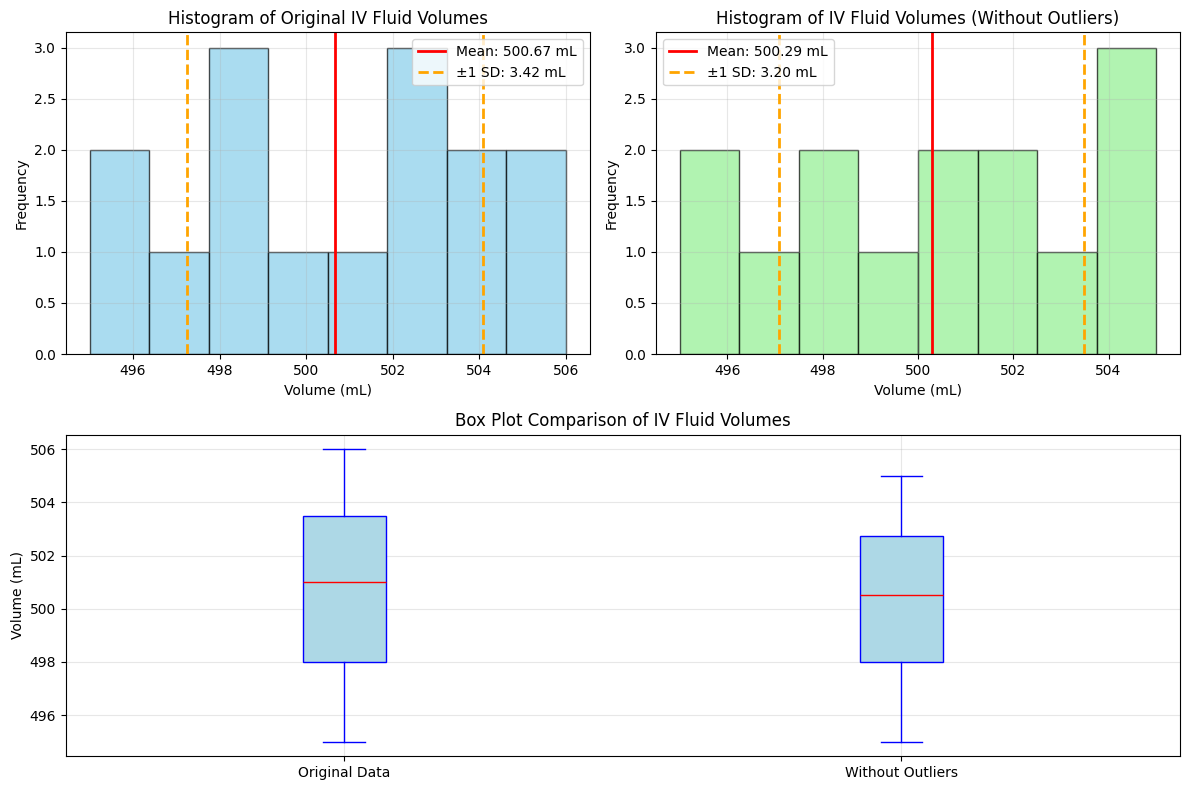

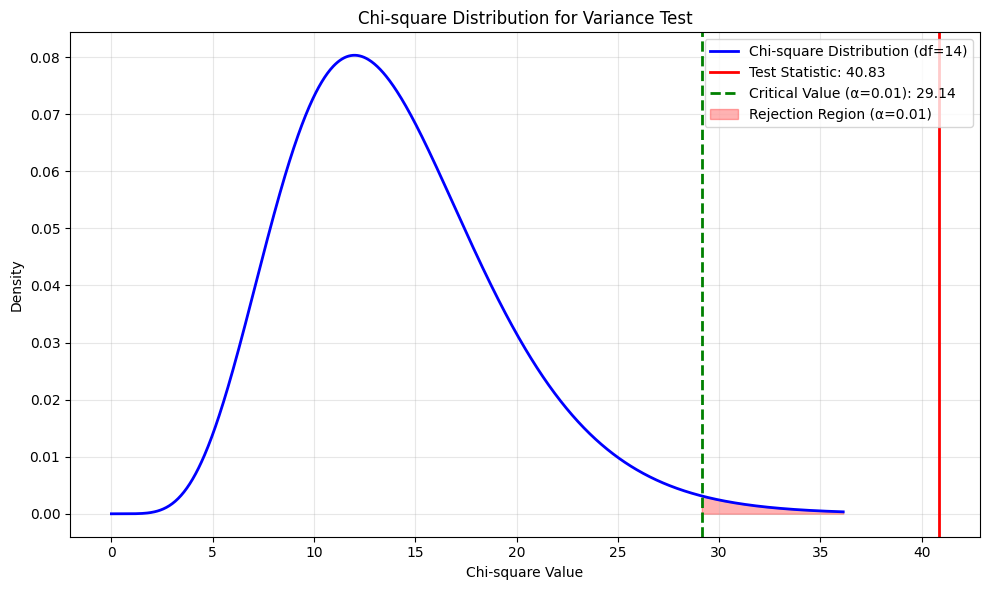

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

volumes = np.array([502, 498, 505, 497, 503, 499, 504, 496, 501, 500, 506, 495, 502, 498, 504])

claimed_variance_max = 4
significance_level = 0.01

sample_variance = np.var(volumes, ddof=1)
print(f"Sample variance: {sample_variance:.4f} mL²")

sample_size = len(volumes)
chi_square_stat = (sample_size - 1) * sample_variance / claimed_variance_max
p_value = 1 - stats.chi2.cdf(chi_square_stat, df=sample_size-1)

print(f"Chi-square statistic: {chi_square_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Critical chi-square value at α={significance_level}: {stats.chi2.ppf(1-significance_level, df=sample_size-1):.4f}")

if p_value < significance_level:
    conclusion = "Reject the null hypothesis"
    explanation = "There is significant evidence that the machine's variance exceeds the specification of 4 mL²."
else:
    conclusion = "Fail to reject the null hypothesis"
    explanation = "There is not enough evidence to suggest that the machine's variance exceeds the specification of 4 mL²."

print(f"Conclusion: {conclusion}")
print(f"Explanation: {explanation}")

outlier_indices = np.where((volumes < 495) | (volumes > 505))[0]
outlier_values = volumes[outlier_indices]
print(f"\nPotential outliers: {outlier_values}")

volumes_no_outliers = volumes[~((volumes < 495) | (volumes > 505))]
print(f"Number of observations after removing outliers: {len(volumes_no_outliers)}")

sample_variance_no_outliers = np.var(volumes_no_outliers, ddof=1)
print(f"Sample variance without outliers: {sample_variance_no_outliers:.4f} mL²")

sample_size_no_outliers = len(volumes_no_outliers)
chi_square_stat_no_outliers = (sample_size_no_outliers - 1) * sample_variance_no_outliers / claimed_variance_max
p_value_no_outliers = 1 - stats.chi2.cdf(chi_square_stat_no_outliers, df=sample_size_no_outliers-1)

print(f"Chi-square statistic without outliers: {chi_square_stat_no_outliers:.4f}")
print(f"P-value without outliers: {p_value_no_outliers:.6f}")
print(f"Critical chi-square value without outliers: {stats.chi2.ppf(1-significance_level, df=sample_size_no_outliers-1):.4f}")

if p_value_no_outliers < significance_level:
    conclusion_no_outliers = "Reject the null hypothesis"
    explanation_no_outliers = "Even after removing outliers, there is significant evidence that the machine's variance exceeds the specification of 4 mL²."
else:
    conclusion_no_outliers = "Fail to reject the null hypothesis"
    explanation_no_outliers = "After removing outliers, there is not enough evidence to suggest that the machine's variance exceeds the specification of 4 mL²."

print(f"Conclusion without outliers: {conclusion_no_outliers}")
print(f"Explanation without outliers: {explanation_no_outliers}")

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(volumes, bins=8, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=np.mean(volumes), color='red', linestyle='-', linewidth=2, label=f'Mean: {np.mean(volumes):.2f} mL')
plt.axvline(x=np.mean(volumes) - np.sqrt(sample_variance), color='orange', linestyle='--', linewidth=2,
            label=f'±1 SD: {np.sqrt(sample_variance):.2f} mL')
plt.axvline(x=np.mean(volumes) + np.sqrt(sample_variance), color='orange', linestyle='--', linewidth=2)
plt.xlabel('Volume (mL)')
plt.ylabel('Frequency')
plt.title('Histogram of Original IV Fluid Volumes')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.hist(volumes_no_outliers, bins=8, alpha=0.7, color='lightgreen', edgecolor='black')
plt.axvline(x=np.mean(volumes_no_outliers), color='red', linestyle='-', linewidth=2,
            label=f'Mean: {np.mean(volumes_no_outliers):.2f} mL')
plt.axvline(x=np.mean(volumes_no_outliers) - np.sqrt(sample_variance_no_outliers), color='orange', linestyle='--', linewidth=2,
            label=f'±1 SD: {np.sqrt(sample_variance_no_outliers):.2f} mL')
plt.axvline(x=np.mean(volumes_no_outliers) + np.sqrt(sample_variance_no_outliers), color='orange', linestyle='--', linewidth=2)
plt.xlabel('Volume (mL)')
plt.ylabel('Frequency')
plt.title('Histogram of IV Fluid Volumes (Without Outliers)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.boxplot([volumes, volumes_no_outliers], labels=['Original Data', 'Without Outliers'], patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='blue'),
           whiskerprops=dict(color='blue'),
           capprops=dict(color='blue'),
           medianprops=dict(color='red'))

plt.ylabel('Volume (mL)')
plt.title('Box Plot Comparison of IV Fluid Volumes')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
x = np.linspace(0, stats.chi2.ppf(0.999, df=sample_size-1), 1000)
y = stats.chi2.pdf(x, df=sample_size-1)
plt.plot(x, y, 'b-', linewidth=2, label=f'Chi-square Distribution (df={sample_size-1})')

plt.axvline(x=chi_square_stat, color='red', linestyle='-', linewidth=2,
            label=f'Test Statistic: {chi_square_stat:.2f}')
plt.axvline(x=stats.chi2.ppf(1-significance_level, df=sample_size-1), color='green', linestyle='--', linewidth=2,
            label=f'Critical Value (α={significance_level}): {stats.chi2.ppf(1-significance_level, df=sample_size-1):.2f}')

reject_x = np.linspace(stats.chi2.ppf(1-significance_level, df=sample_size-1),
                       stats.chi2.ppf(0.999, df=sample_size-1), 100)
reject_y = stats.chi2.pdf(reject_x, df=sample_size-1)
plt.fill_between(reject_x, reject_y, alpha=0.3, color='red', label=f'Rejection Region (α={significance_level})')

plt.xlabel('Chi-square Value')
plt.ylabel('Density')
plt.title('Chi-square Distribution for Variance Test')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()